In [ ]:
#Part 1: Understanding Product Categories
#Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [6]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [40]:
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [42]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## *Part 1: Understanding Product Categories* ##

In [28]:
#1. Frequency Tables

frequency_table = df['category'].value_counts()

top_five = frequency_table.head(5)

The top 5 most listed product categories:
 Sports & Outdoors,
 Beauty,
 Handmade Clothing, Shoes & Accessories,
 Bath & Body,
 Birthday Gifts


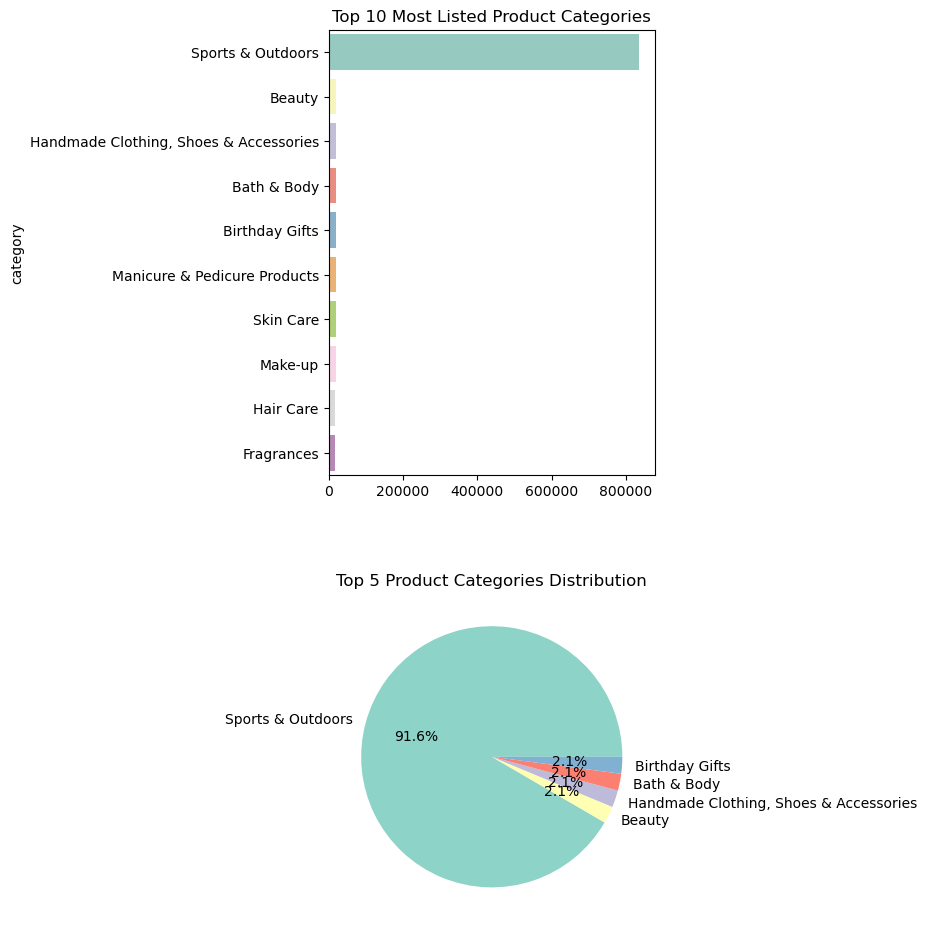

Analysis: 
The top 5 most listed product categories on Amazon UK:
 Sports & Outdoors,
 Beauty,
 Handmade Clothing, Shoes & Accessories,
 Bath & Body,
 Birthday Gifts

The Sports & Outdoors product category dominates the share of the top 5 product listings with 91.6%


In [146]:
#2. Visualizations

top_ten = frequency_table.head(10)
top_five = frequency_table.head(5)

fig, ax = plt.subplots(2,1, figsize=(8,10), dpi=100) 
sns.barplot(y=top_ten.index, x=top_ten.values, palette="Set3",hue=top_ten.index, legend= False, ax=ax[0])
ax[0].set_title("Top 10 Most Listed Product Categories")
ax[1].pie(top_five.values, labels=top_five.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(top_five)))
ax[1].set_title("Top 5 Product Categories Distribution")
plt.tight_layout()
plt.show()

print(f"Analysis: \nThe top 5 most listed product categories on Amazon UK:\n {',\n '.join(top_five.index)}")
print("\nThe Sports & Outdoors product category dominates the share of the top 5 product listings with 91.6%")

## *Part 2: Product Pricing* ##

In [79]:
#1. Measures of Centrality

mean_price = df['price'].mean().round(2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

Measures of Centrality (Price): 
Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99
Analysis: The average price is significantly higher than the median and mode, indicating some outliers with high prices


In [87]:
#2. Measures of Dispersion

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

Measures of Dispersion and Range (Price):
Variance: 119445.4853225653
Standard Deviation: 345.6088617535223
Min Price: 0.0
Max Price: 100000.0
Range: 100000.0
25th Percentile (Q1): 9.99
Median (Q2): 19.09
75th Percentile (Q3): 45.99
Analysis: The prices of products vary significantly, as indicated by a standard deviation of 345 gbp. 50% of the products are priced between 9.99 and 45.99 gbp.


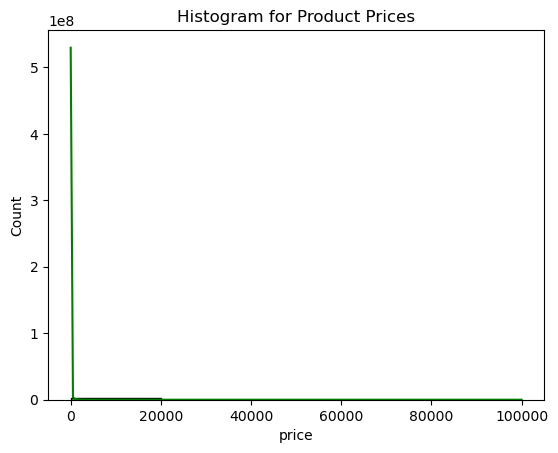

Histogram is not appropriate because the distribution is too spread out.


In [105]:
fig, axes = plt.subplots(dpi = 100)
sns.histplot(df['price'], kde=True, bins=5, color="green", ax=axes)
axes.set_title("Histogram for Product Prices")
plt.show()

print("Analysis: Histogram is not appropriate because the distribution is too spread out.")

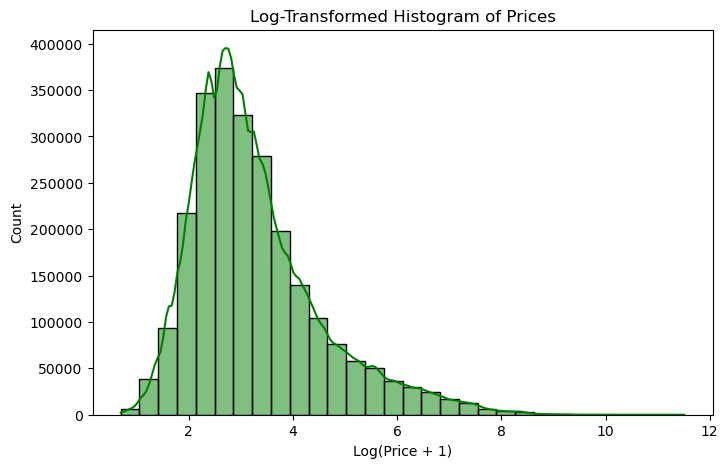

Solution: Apply a log transformation to compress the distribution and better see the shape.


In [137]:
log_prices = np.log1p(filtered_prices)  
plt.figure(figsize=(8,5))
sns.histplot(log_prices, kde=True, color="green", bins=30)
plt.xlabel("Log(Price + 1)")
plt.title("Log-Transformed Histogram of Prices")
plt.show()

print("Solution: Apply a log transformation to compress the distribution and better see the shape.")

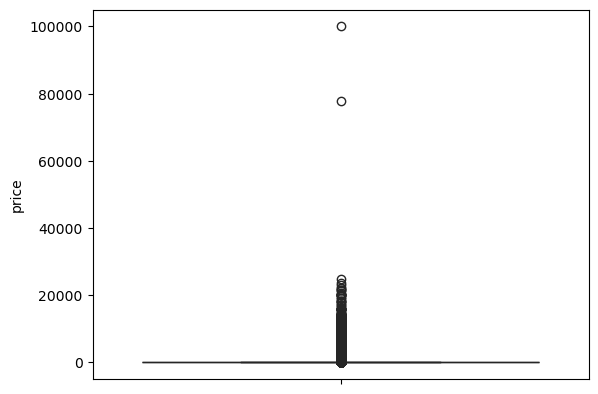

Analysis: With the box plot we can see two potential outliers between 79,000 - 100,000 in price.


In [139]:
sns.boxplot(data = df['price'], color="green")
plt.show()

print("Analysis: With the box plot we can see two potential outliers between 79,000 - 100,000 in price.")

In [152]:
print(f"\nMeasures of Centrality (Price): \nMean Price: {mean_price}\nMedian Price: {median_price}\nMode Price: {mode_price}")
print("\nAnalysis: The average price is significantly higher than the median and mode, indicating some outliers with high prices")
print(f"\nMeasures of Dispersion and Range (Price):\n"
      f"\nVariance: {variance_price}\n"
      f"Standard Deviation: {std_dev_price}\n"
      f"Min Price: {min_price}\n"
      f"Max Price: {max_price}\n"
      f"Range: {range_price}\n"
      f"25th Percentile (Q1): {quantiles_price[0.25]}\n"
      f"Median (Q2): {quantiles_price[0.5]}\n"
      f"75th Percentile (Q3): {quantiles_price[0.75]}")

print("""\nAnalysis: The prices of products vary significantly, as indicated by a standard deviation of 345 gbp. Approximately 50% of the products are priced between 9.99 and 45.99 gbp with a couple outliers priced much higher.""")


Measures of Centrality (Price): 
Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99

Analysis: The average price is significantly higher than the median and mode, indicating some outliers with high prices

Measures of Dispersion and Range (Price):

Variance: 119445.4853225653
Standard Deviation: 345.6088617535223
Min Price: 0.0
Max Price: 100000.0
Range: 100000.0
25th Percentile (Q1): 9.99
Median (Q2): 19.09
75th Percentile (Q3): 45.99

Analysis: The prices of products vary significantly, as indicated by a standard deviation of 345 gbp. Approximately 50% of the products are priced between 9.99 and 45.99 gbp with a couple outliers priced much higher.


## * Part 3: Unpacking Product Ratings * ##

In [ ]:
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [156]:
#1. Measures of Centrality

mean_rating = df['stars'].mean().round(2)
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"\nMeasures of Centrality (rating): \nMean Rating: {mean_rating}\nMedian Rating: {median_rating}\nMode Rating: {mode_rating}")
print("\nAnalysis: The average rating is higher than the median and mode, indicating that many products don't have ratings")


Measures of Centrality (rating): 
Mean Rating: 2.15
Median Rating: 0.0
Mode Rating: 0.0

Analysis: The average rating is higher than the median and mode, indicating that many products don't have ratings


In [162]:
#2. Measures of Dispersion

variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

print(f"\nMeasures of Dispersion and Range (Rating):\n"
      f"\nVariance: {variance_rating}\n"
      f"Standard Deviation: {std_dev_rating}\n"
      f"Min Rating: {min_rating}\n"
      f"Max Rating: {max_rating}\n"
      f"Range: {range_rating}\n"
      f"25th Percentile (Q1): {quantiles_rating[0.25]}\n"
      f"Median (Q2): {quantiles_rating[0.5]}\n"
      f"75th Percentile (Q3): {quantiles_rating[0.75]}")

print("\nAnalysis: We can see that most products don't have reviews, we should try filtering for products with at least one review to understand dispersion.")


Measures of Dispersion and Range (Rating):

Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Min Rating: 0.0
Max Rating: 5.0
Range: 5.0
25th Percentile (Q1): 0.0
Median (Q2): 0.0
75th Percentile (Q3): 4.4

Analysis: We can see that most products don't have reviews, we should try filtering for products with at least one review to understand dispersion.


In [164]:
filtered_df = df[df['reviews'] > 0] #filter out products without reviews

variance_rating = filtered_df['stars'].var()
std_dev_rating = filtered_df['stars'].std()
min_rating = filtered_df['stars'].min()
max_rating = filtered_df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = filtered_df['stars'].quantile([0.25, 0.5, 0.75])

print(f"\nMeasures of Dispersion and Range (Rating with at least 1 review):\n"
      f"\nVariance: {variance_rating}\n"
      f"Standard Deviation: {std_dev_rating}\n"
      f"Min Rating: {min_rating}\n"
      f"Max Rating: {max_rating}\n"
      f"Range: {range_rating}\n"
      f"25th Percentile (Q1): {quantiles_rating[0.25]}\n"
      f"Median (Q2): {quantiles_rating[0.5]}\n"
      f"75th Percentile (Q3): {quantiles_rating[0.75]}")

print("\nAnalysis: For those products with at least one review, we don't see very much of a spread, with 75% of products having a 4.1 star rating or higher.")


Measures of Dispersion and Range (Rating with at least 1 review):

Variance: 0.30834337523805183
Standard Deviation: 0.5552867504614637
Min Rating: 1.0
Max Rating: 5.0
Range: 4.0
25th Percentile (Q1): 4.1
Median (Q2): 4.4
75th Percentile (Q3): 4.6

Analysis: For those products with at least one review, we don't see very much of a spread, with 75% of products having a 4.1 star rating or higher.


In [172]:
skewness_rating = filtered_df['stars'].skew()
kurtosis_rating = filtered_df['stars'].kurtosis()

print(f"\nAnalysis:\nSkewness: {skewness_rating}, \nKurtosis: {kurtosis_rating}")
print("""\nWe can see that the ratings for products with at least one review are negatively skewed with a few outliers with poor reviews. We can also see a high kurtosis score indicating a large spike in the distribution for ratings between 4-5 stars""")


Analysis:
Skewness: -2.3795681122127945, 
Kurtosis: 9.78193769066435

We can see that the ratings for products with at least one review are negatively skewed with a few outliers with poor reviews. We can also see a high kurtosis score indicating a large spike in the distribution for ratings between 4-5 stars


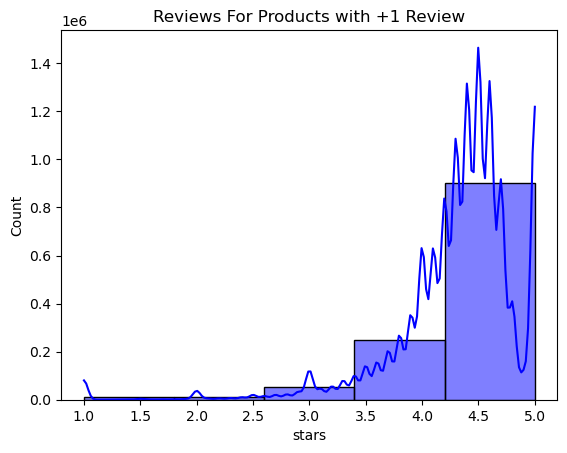

Analysis: We can see that 4-5 star reviews are the most common.


In [176]:
fig, axes = plt.subplots(dpi = 100)
sns.histplot(filtered_df['stars'], kde=True, bins=5, color="blue", ax=axes)
axes.set_title("Reviews For Products with +1 Review")
plt.show()

print("Analysis: We can see that 4-5 star reviews are the most common.")